In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Read csv
csv_path = ("./city_data.csv")
csv_path2 = ("./ride_data.csv")

city_data = pd.read_csv(csv_path)
ride_data = pd.read_csv(csv_path2)

#Show columns in city_data
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
#Show columns in ride_data
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
#Merge tables
merge_table = pd.merge(ride_data, city_data, on="city")
#Re-set index 
merge_table = merge_table.set_index("city")
#Group by City
grouped_merge = merge_table.groupby("city")

In [6]:
#Get total driver count per city
num_drivers = grouped_merge.mean()
num_drivers = num_drivers["driver_count"]
num_drivers = pd.DataFrame(num_drivers)
num_drivers.head()

,driver_count
city,
Alvarezhaven,21.0
Alyssaberg,67.0
Anitamouth,16.0
Antoniomouth,21.0
Aprilchester,49.0


In [7]:
#Get average fare per city
avg_fare = grouped_merge.mean()
avg_fare = avg_fare["fare"]
avg_fare = pd.DataFrame(avg_fare)
avg_fare.head()

,fare
city,
Alvarezhaven,23.928710
Alyssaberg,20.609615
Anitamouth,37.315556
Antoniomouth,23.625000
Aprilchester,21.981579


In [8]:
#Get total number of rides per city
rides_count = ride_data.groupby(["city"]).count()
rides_count = rides_count["date"]
rides_count = pd.DataFrame(rides_count)
rides_count.head()

,date
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [9]:
#Filter data into lists by city type: (urban, suburban, rural)
urban = merge_table.loc(merge_table["type"] == "urban")
suburban = merge_table.loc(merge_table["type"] == "suburban")
rural = merge_table.loc(merge_table["type"] == "rural")

In [10]:
#Bubble plot plan:
#X-axis: Average fare per city
#Y-axis: Total Number of Drivers per city
#Size of bubble: Total Number of Rides per city
#Color of bubbles: city type(urban, suburban, rural)

In [15]:
#Customize Scatter Plot
#Set x_axis
x_axis = avg_fare["fare"]
#Set y_axis
drivers = (num_drivers["driver_count"])
#Set bubble size based on ride count
size = [i * 25 for i in rides_count["date"]]

#Add titles
plt.title("Number of Rides Per City")
plt.xlabel("Avg Fare Per City")
plt.ylabel("Number of Drivers Per City")

#Change plot size
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width and height
fig_size[0] = 25
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

#Set colors for city types
city_types = (urban, suburban, rural)
colors = ("green", "blue", "purple")
groups = ("urban", "suburban", "rural")

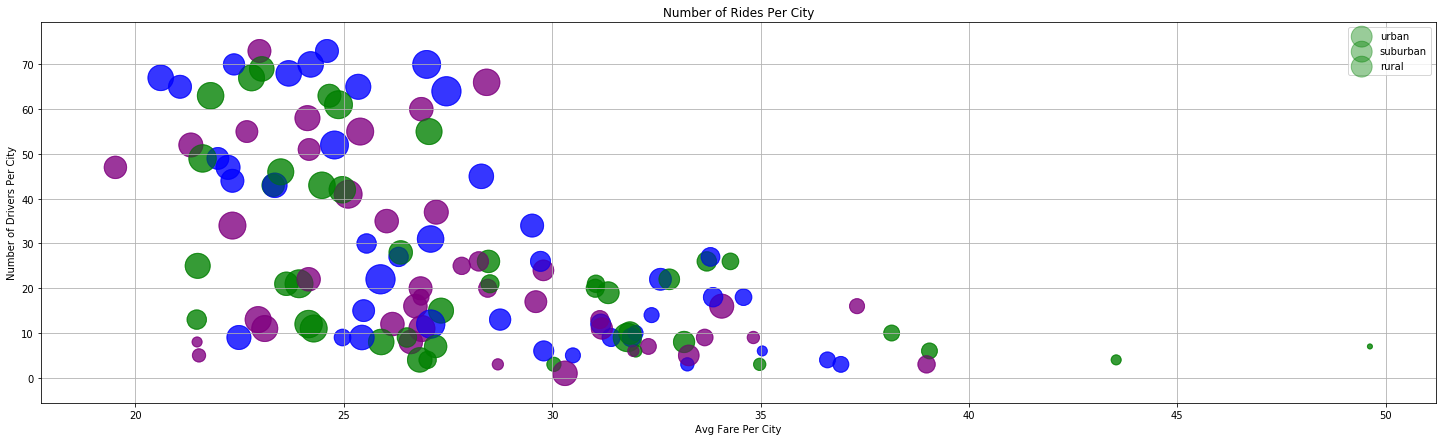

In [16]:
#Add grid
plt.grid()

#Scatter Plot
for data, color, group in zip(city_types, colors, groups):
    plt.scatter(x_axis, drivers, s=size * 40, alpha=0.4, c=colors)
    
plt.legend(list(groups))

#Show plot
plt.show()

#add legend?
lgnd = plt.legend(loc='best')
lgnd.legendHandles[0]._sizes = [70]
lgnd.legendHandles[1]._sizes = [70]
lgnd.legendHandles[2]._sizes = [70]